In [ ]:
# This file is being created by Leena Goyal
# This is part of the code used by DataDragons for Karnataka State Police

In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

import seaborn as sns
from scipy import stats
import missingno as msno # Ploting missng values
import plotly.graph_objects as go

In [2]:
from numpy import array
from matplotlib import cm
from matplotlib.dates import date2num
# from mpl_toolkits.basemap import Basemap
# import cartopy.crs as ccrs

# from matplotlib.patches import Polygon
# from matplotlib.collections import PatchCollection
# from matplotlib.colors import Normalize

In [3]:
df = pd.read_csv('archive/crime/42_District_wise_crimes_committed_against_women_2001_2012.csv')

In [4]:
df.head()

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0


In [5]:
df = df[df['STATE/UT'] == 'KARNATAKA']

In [6]:
df.reset_index(drop=True, inplace=True)

In [7]:
df = df.drop(columns=['STATE/UT'])

In [8]:
df.head()

,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,BAGALKOT,2001,2,7,1,39,0,50,0
1,BANGALORE COMMR.,2001,40,56,40,223,51,229,0
2,BANGALORE RURAL,2001,13,10,30,90,0,123,0
3,BELGAUM,2001,8,12,4,62,0,125,0
4,BELLARY,2001,16,11,5,82,0,49,0


In [9]:
df_all = df[['DISTRICT','Year','Rape','Kidnapping and Abduction','Dowry Deaths']]

In [10]:
df_all.head(100)
# Tumkur ---> Tumkuru
# Ramnagar, Kalaburgi city ---> new district
# dict of new names ... 

,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths
0,BAGALKOT,2001,2,7,1
1,BANGALORE COMMR.,2001,40,56,40
2,BANGALORE RURAL,2001,13,10,30
3,BELGAUM,2001,8,12,4
4,BELLARY,2001,16,11,5
...,...,...,...,...,...
95,TOTAL,2003,321,244,194
96,BAGALKOT,2004,3,14,2
97,BANGALORE COMMR.,2004,32,61,44
98,BANGALORE RURAL,2004,29,20,31


In [11]:
print(len(df['DISTRICT'].unique()))

36


# Rape DataSet

In [12]:
df['DISTRICT'].unique()

array(['BAGALKOT', 'BANGALORE COMMR.', 'BANGALORE RURAL', 'BELGAUM',
       'BELLARY', 'BIDAR', 'BIJAPUR', 'CHAMARAJNAGAR', 'CHICKMAGALUR',
       'CHITRADURGA', 'DAKSHIN KANNADA', 'DAVANAGERE', 'DHARWAD COMMR.',
       'DHARWAD RURAL', 'GADAG', 'GULBARGA', 'HASSAN', 'HAVERI', 'K.G.F.',
       'KODAGU', 'KOLAR', 'KOPPAL', 'MANDYA', 'MYSORE COMMR.',
       'MYSORE RURAL', 'RAICHUR', 'RAILWAYS', 'SHIMOGA', 'TUMKUR',
       'UDUPI', 'UTTAR KANNADA', 'TOTAL', 'CBPURA', 'RAMANAGAR',
       'YADGIRI', 'MANGALORE CITY'], dtype=object)

In [13]:
districts_drop = ['CBPURA', 'RAMANAGAR','YADGIRI', 'MANGALORE CITY','TOTAL']
df = df.drop(index=districts_drop,errors='ignore')

In [14]:
districts_to_drop = ['TOTAL']
df = df[~df['DISTRICT'].isin(districts_to_drop)]

In [15]:
ramanagar_rows = df[df['DISTRICT'] == 'TOTAL']
print(ramanagar_rows)

Empty DataFrame
Columns: [DISTRICT, Year, Rape, Kidnapping and Abduction, Dowry Deaths, Assault on women with intent to outrage her modesty, Insult to modesty of Women, Cruelty by Husband or his Relatives, Importation of Girls]
Index: []


In [16]:
df.head(20)

,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,BAGALKOT,2001,2,7,1,39,0,50,0
1,BANGALORE COMMR.,2001,40,56,40,223,51,229,0
2,BANGALORE RURAL,2001,13,10,30,90,0,123,0
3,BELGAUM,2001,8,12,4,62,0,125,0
4,BELLARY,2001,16,11,5,82,0,49,0
5,BIDAR,2001,7,10,2,90,3,51,0
6,BIJAPUR,2001,6,19,1,65,0,92,0
7,CHAMARAJNAGAR,2001,4,5,7,43,0,15,0
8,CHICKMAGALUR,2001,8,7,4,57,8,83,0
9,CHITRADURGA,2001,18,0,2,48,0,35,0


In [17]:
df_rape = df.drop(columns=['Kidnapping and Abduction','Dowry Deaths'])

In [18]:
df_rape.head()

,DISTRICT,Year,Rape,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,BAGALKOT,2001,2,39,0,50,0
1,BANGALORE COMMR.,2001,40,223,51,229,0
2,BANGALORE RURAL,2001,13,90,0,123,0
3,BELGAUM,2001,8,62,0,125,0
4,BELLARY,2001,16,82,0,49,0


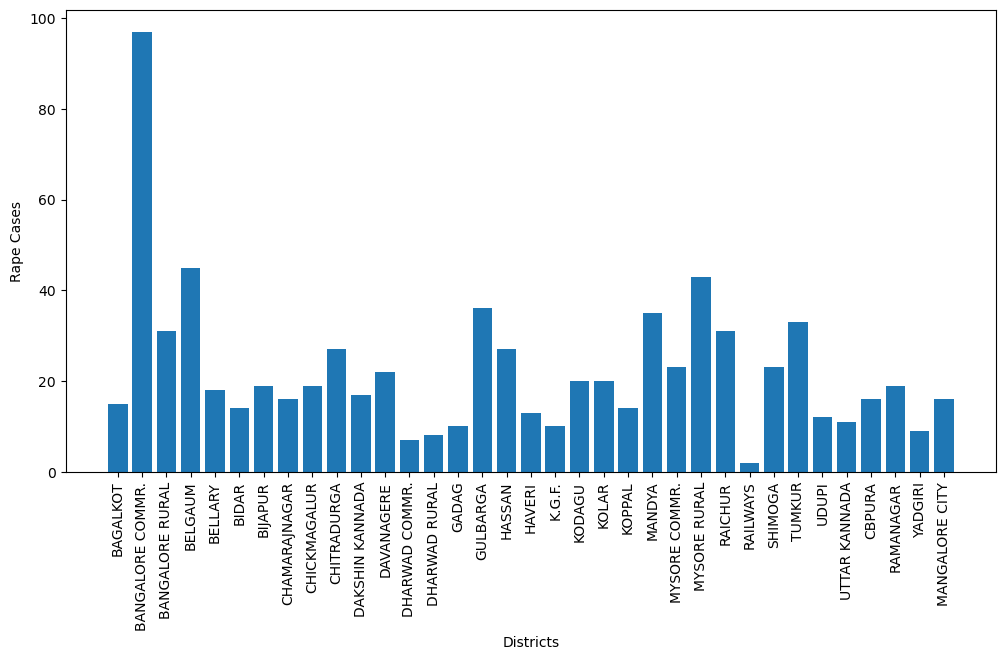

In [19]:
plt.figure(figsize=(12,6))
plt.bar(df_rape['DISTRICT'],df_rape['Rape'])

plt.xlabel('Districts')
plt.ylabel('Rape Cases')

plt.xticks(rotation='vertical');

In [20]:
df_rape_year = df_rape.groupby('Year')['Rape'].sum().reset_index(name='Total Rapes')

In [21]:
df_rape_year

,Year,Total Rapes
0,2001,293
1,2002,292
2,2003,321
3,2004,291
4,2005,343
5,2006,400
6,2007,436
7,2008,446
8,2009,509
9,2010,586


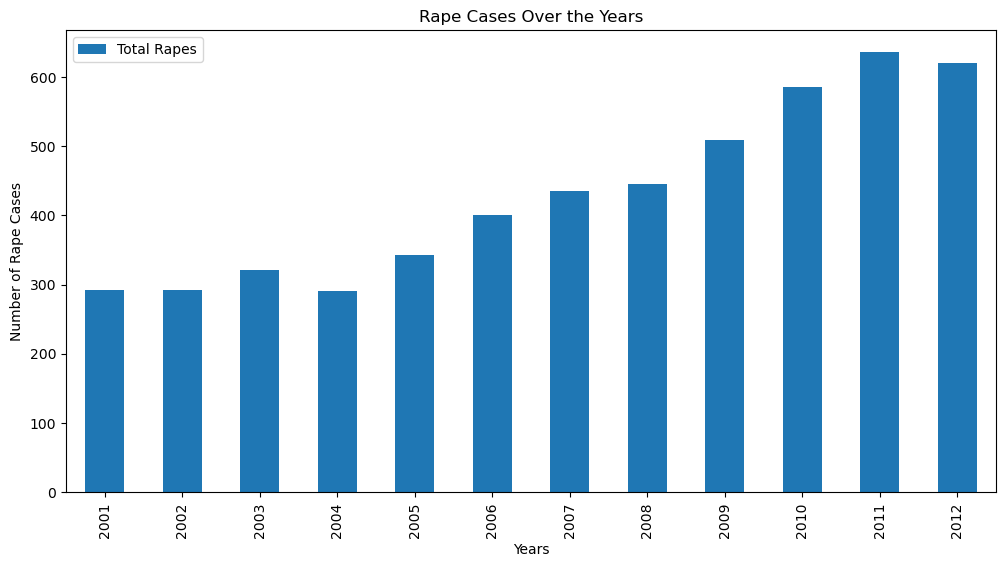

In [22]:
# pivot_df = df_rape.pivot(index='DISTRICT', columns='Year', values='Rape')

df_rape_year.plot(kind='bar', x='Year', y='Total Rapes', figsize=(12, 6))
plt.xlabel('Years')
plt.ylabel('Number of Rape Cases')
plt.title('Rape Cases Over the Years')
plt.xticks(rotation='vertical')

plt.show()

In [23]:
# df = df.drop(columns=['STATE/UT'])

In [24]:
df.head()

,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,BAGALKOT,2001,2,7,1,39,0,50,0
1,BANGALORE COMMR.,2001,40,56,40,223,51,229,0
2,BANGALORE RURAL,2001,13,10,30,90,0,123,0
3,BELGAUM,2001,8,12,4,62,0,125,0
4,BELLARY,2001,16,11,5,82,0,49,0


In [25]:
df_total = df.groupby('DISTRICT')[['Rape','Kidnapping and Abduction']].sum().reset_index()

In [26]:
df_total.head()

,DISTRICT,Rape,Kidnapping and Abduction
0,BAGALKOT,86,126
1,BANGALORE COMMR.,642,947
2,BANGALORE RURAL,266,175
3,BELGAUM,280,330
4,BELLARY,150,173


In [27]:
df

,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,BAGALKOT,2001,2,7,1,39,0,50,0
1,BANGALORE COMMR.,2001,40,56,40,223,51,229,0
2,BANGALORE RURAL,2001,13,10,30,90,0,123,0
3,BELGAUM,2001,8,12,4,62,0,125,0
4,BELLARY,2001,16,11,5,82,0,49,0
...,...,...,...,...,...,...,...,...,...
393,SHIMOGA,2012,14,24,6,158,3,222,0
394,TUMKUR,2012,33,10,18,171,0,132,0
395,UDUPI,2012,5,3,0,41,1,38,0
396,UTTAR KANNADA,2012,7,10,1,97,8,78,0


In [28]:
df.isnull().sum()

DISTRICT                                               0
Year                                                   0
Rape                                                   0
Kidnapping and Abduction                               0
Dowry Deaths                                           0
Assault on women with intent to outrage her modesty    0
Insult to modesty of Women                             0
Cruelty by Husband or his Relatives                    0
Importation of Girls                                   0
dtype: int64

# Statistical Analysis

In [29]:
df.head()

,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,BAGALKOT,2001,2,7,1,39,0,50,0
1,BANGALORE COMMR.,2001,40,56,40,223,51,229,0
2,BANGALORE RURAL,2001,13,10,30,90,0,123,0
3,BELGAUM,2001,8,12,4,62,0,125,0
4,BELLARY,2001,16,11,5,82,0,49,0


In [30]:
df_stat = df.drop(columns=['Year'])
df_stat.head()

,DISTRICT,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,BAGALKOT,2,7,1,39,0,50,0
1,BANGALORE COMMR.,40,56,40,223,51,229,0
2,BANGALORE RURAL,13,10,30,90,0,123,0
3,BELGAUM,8,12,4,62,0,125,0
4,BELLARY,16,11,5,82,0,49,0


In [31]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df_stat['district_encoded'] = label_encoder.fit_transform(df_stat['DISTRICT'])

In [32]:
df_stat = df_stat.drop(columns=['DISTRICT'])

In [33]:
df_stat.head()

,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls,district_encoded
0,2,7,1,39,0,50,0,0
1,40,56,40,223,51,229,0,1
2,13,10,30,90,0,123,0,2
3,8,12,4,62,0,125,0,3
4,16,11,5,82,0,49,0,4


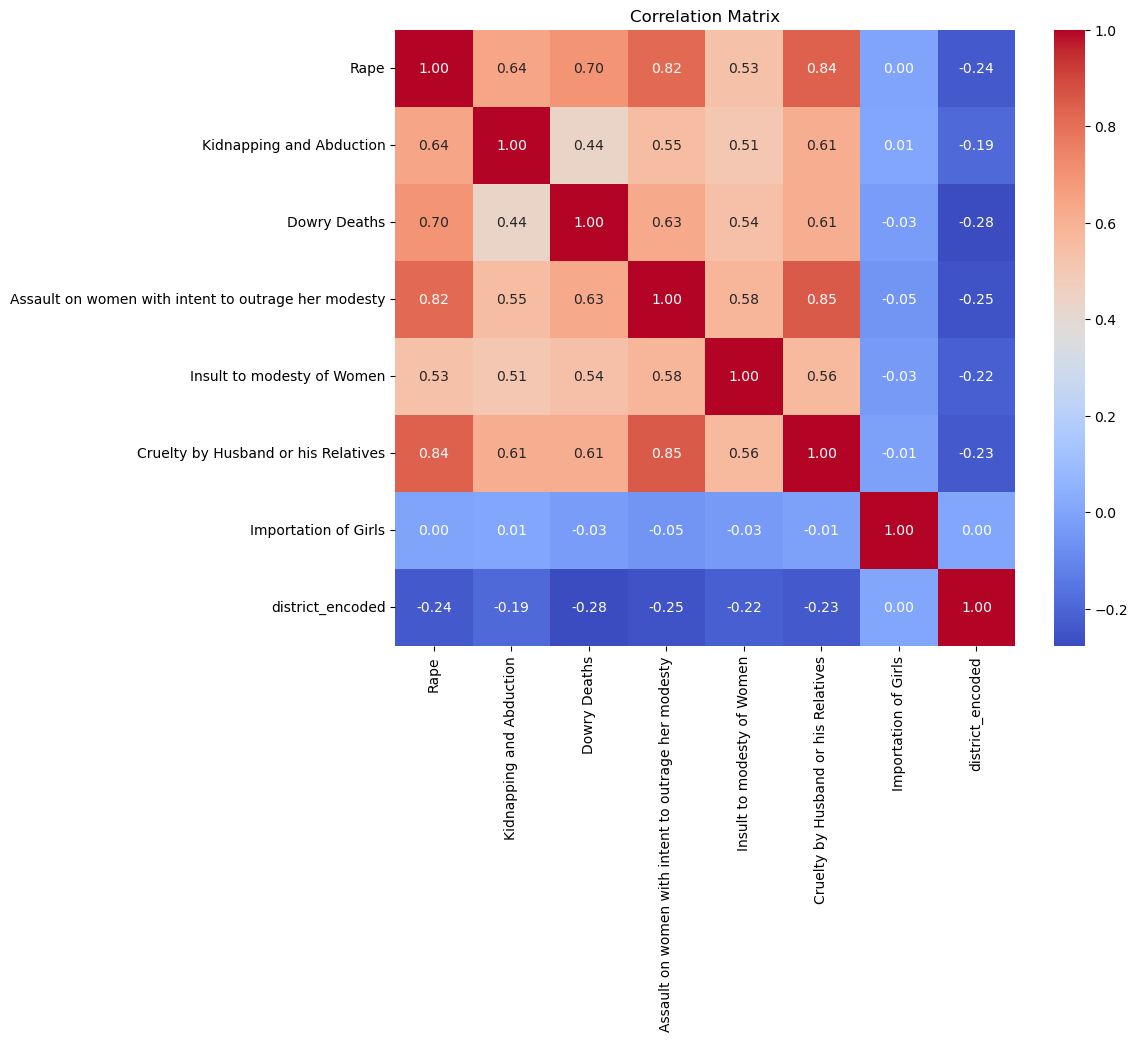

In [34]:
import seaborn as sns

correlation_matrix = df_stat.corr()
plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

#  Cross-sectional Data Visuals

In [39]:
df_grouped = df.groupby('DISTRICT')[['Rape', 'Kidnapping and Abduction', 'Dowry Deaths','Assault on women with intent to outrage her modesty','Insult to modesty of Women','Cruelty by Husband or his Relatives','Importation of Girls']].sum().reset_index()

In [40]:
df_grouped.describe()

,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,147.828571,151.857143,83.371429,677.114286,23.742857,858.628571,1.342857
std,117.418679,165.092157,99.918227,512.569523,68.649298,763.783273,3.940311
min,5.000000,2.000000,1.000000,17.000000,0.000000,3.000000,0.000000
25%,74.000000,56.500000,30.000000,308.000000,2.000000,353.000000,0.000000
50%,127.000000,137.000000,57.000000,604.000000,3.000000,648.000000,0.000000
75%,197.500000,176.000000,102.500000,959.500000,24.000000,1145.000000,0.500000
max,642.000000,947.000000,552.000000,2630.000000,407.000000,3832.000000,21.000000


Mean is the average number of reported rape cases across all districts and years. With a high dispersion or Standard Deviation representing rape cases varies more widely across districts and years. Different quartiles are also mentioned with the median of 128. Min and Max values are 5 and 642 cases respectively.

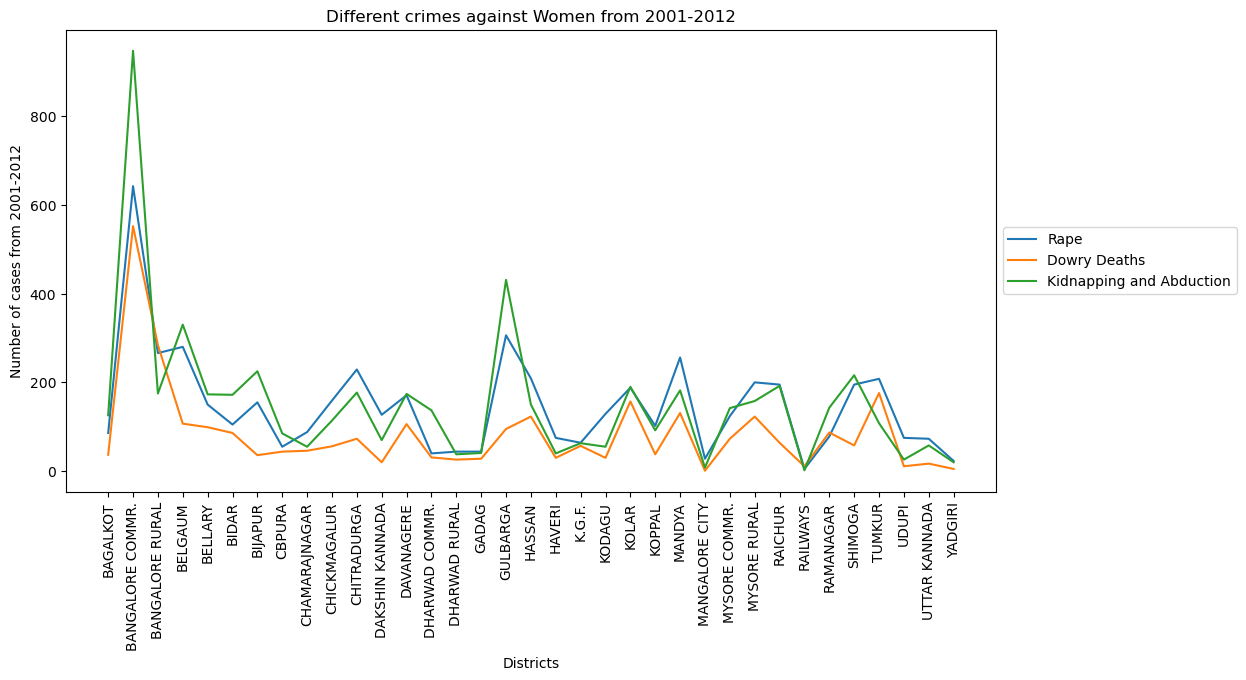

In [42]:
plt.figure(figsize=(12,6))

# Plot each line and label it based on column name
for column in ['Rape', 'Dowry Deaths', 'Kidnapping and Abduction']:
    plt.plot(df_grouped['DISTRICT'], df_grouped[column], label=column)

plt.xlabel('Districts')
plt.ylabel('Number of cases from 2001-2012')
plt.xticks(rotation='vertical')

plt.title('Different crimes against Women from 2001-2012')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


Notice how the number of rapes somewhat aligns with the number of kidnapping and abduction cases for women.

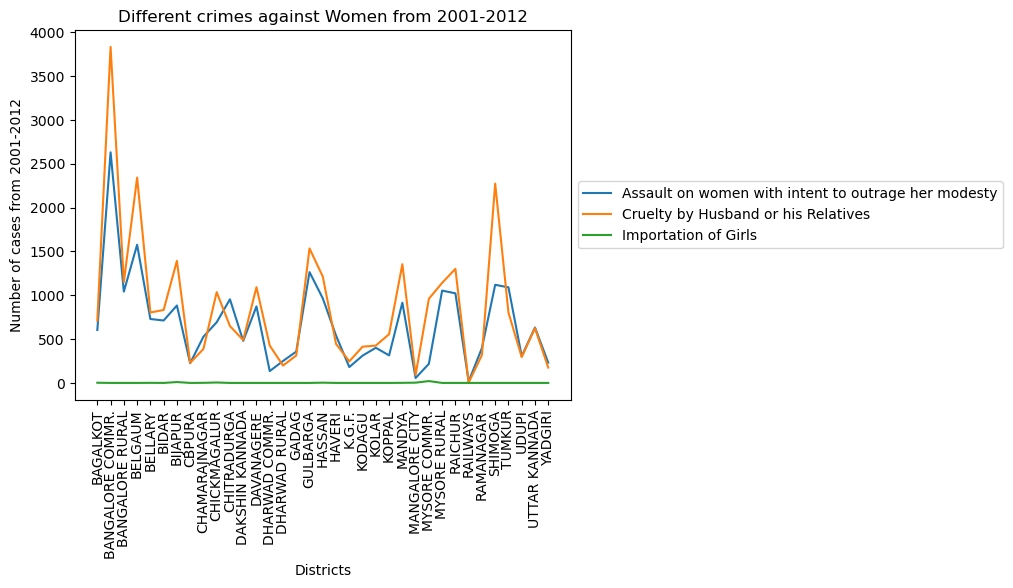

In [43]:
# 'Assault on women with intent to outrage her modesty', 'Cruelty by Husband or his Relatives', 'Importation of Girls'

for column in ['Assault on women with intent to outrage her modesty', 'Cruelty by Husband or his Relatives', 'Importation of Girls']:
    plt.plot(df_grouped['DISTRICT'], df_grouped[column], label=column)

plt.xlabel('Districts')
plt.ylabel('Number of cases from 2001-2012')
plt.xticks(rotation='vertical')

plt.title('Different crimes against Women from 2001-2012')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

Similar, number of assualts on women with intention to outrage her modesty seems to align with cruely by husband and relatives.

In [44]:
df_grouped['Total Crimes'] = df_grouped[['Rape', 'Dowry Deaths', 'Kidnapping and Abduction','Assault on women with intent to outrage her modesty', 'Insult to modesty of Women','Cruelty by Husband or his Relatives', 'Importation of Girls']].sum(axis=1)

In [45]:
df_total = df_grouped.drop(columns=['Rape', 'Dowry Deaths', 'Kidnapping and Abduction','Assault on women with intent to outrage her modesty', 'Insult to modesty of Women','Cruelty by Husband or his Relatives', 'Importation of Girls'])

In [46]:
df_total.head()

,DISTRICT,Total Crimes
0,BAGALKOT,1578
1,BANGALORE COMMR.,9010
2,BANGALORE RURAL,2917
3,BELGAUM,4676
4,BELLARY,1957


<function matplotlib.pyplot.show(close=None, block=None)>

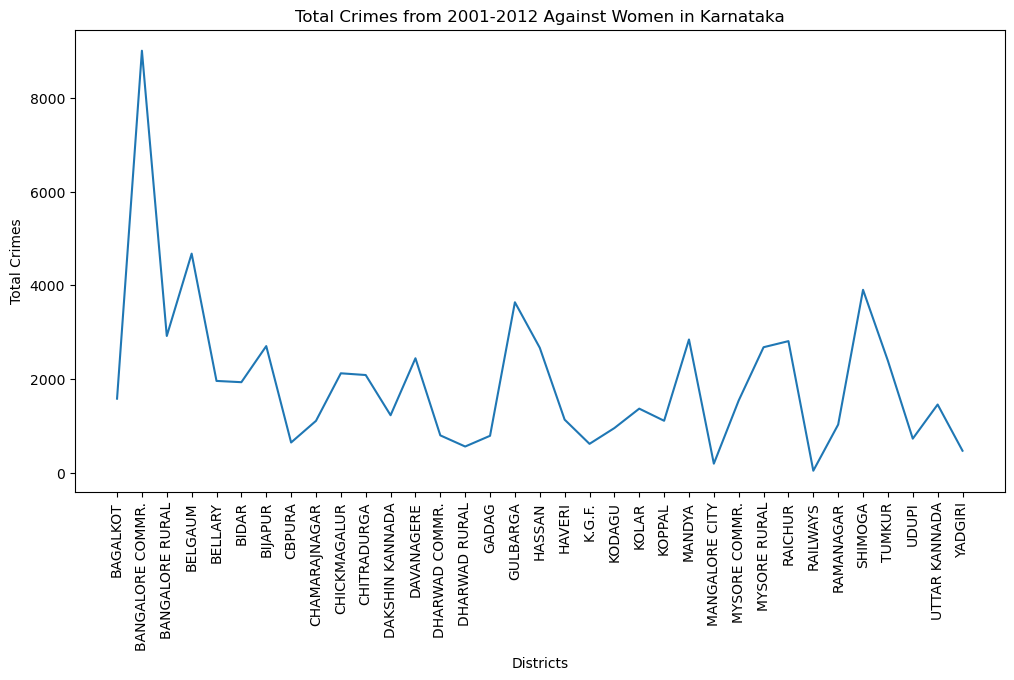

In [47]:
plt.figure(figsize=(12,6))
plt.plot(df_total['DISTRICT'],df_total['Total Crimes'])

plt.xlabel('Districts')
plt.ylabel('Total Crimes')

plt.title('Total Crimes from 2001-2012 Against Women in Karnataka')

plt.xticks(rotation='vertical')
plt.show

# Time Series Visuals

In [48]:
df_yearly = df.groupby(['DISTRICT','Year']).sum().reset_index()

In [49]:
df_yearly

,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,BAGALKOT,2001,2,7,1,39,0,50,0
1,BAGALKOT,2002,4,7,2,53,1,63,0
2,BAGALKOT,2003,12,11,2,44,0,45,0
3,BAGALKOT,2004,3,14,2,40,0,54,0
4,BAGALKOT,2005,4,4,1,43,4,68,0
...,...,...,...,...,...,...,...,...,...
382,UTTAR KANNADA,2011,11,4,3,73,12,75,0
383,UTTAR KANNADA,2012,7,10,1,97,8,78,0
384,YADGIRI,2010,5,0,3,65,3,47,0
385,YADGIRI,2011,9,0,2,69,0,65,0


In [50]:
df_yearly['Total Crimes'] = df_yearly.iloc[:, 2:].sum(axis=1)

In [51]:
df_yearly = df_yearly.drop(columns=['Rape', 'Dowry Deaths', 'Kidnapping and Abduction', 'Assault on women with intent to outrage her modesty', 'Insult to modesty of Women', 'Cruelty by Husband or his Relatives', 'Importation of Girls'])

In [52]:
df_yearly

,DISTRICT,Year,Total Crimes
0,BAGALKOT,2001,99
1,BAGALKOT,2002,130
2,BAGALKOT,2003,114
3,BAGALKOT,2004,113
4,BAGALKOT,2005,124
...,...,...,...
382,UTTAR KANNADA,2011,178
383,UTTAR KANNADA,2012,201
384,YADGIRI,2010,123
385,YADGIRI,2011,145


# Total Crimes from 2001-2012 District wise Total Crimes Against Women

Function to retrieve year wise district data for total crimes.

In [53]:
def plot_yearly_data(df, start_year, end_year):
    plt.figure(figsize=(12, 6))

    for year in range(start_year, end_year + 1):
        df_year = df[df['Year'] == year].reset_index()
        plt.plot(df_year['DISTRICT'], df_year['Total Crimes'], label=str(year))

    plt.xlabel('Districts')
    plt.ylabel('Total Crimes Against Women')
    plt.title(f'Total crimes against Women from {start_year} to {end_year}')
    plt.legend()
    plt.xticks(rotation='vertical')
    plt.show()

In [66]:
data = df.groupby(['DISTRICT', 'Year']).sum().reset_index()

In [67]:
data.head()

,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,BAGALKOT,2001,2,7,1,39,0,50,0
1,BAGALKOT,2002,4,7,2,53,1,63,0
2,BAGALKOT,2003,12,11,2,44,0,45,0
3,BAGALKOT,2004,3,14,2,40,0,54,0
4,BAGALKOT,2005,4,4,1,43,4,68,0


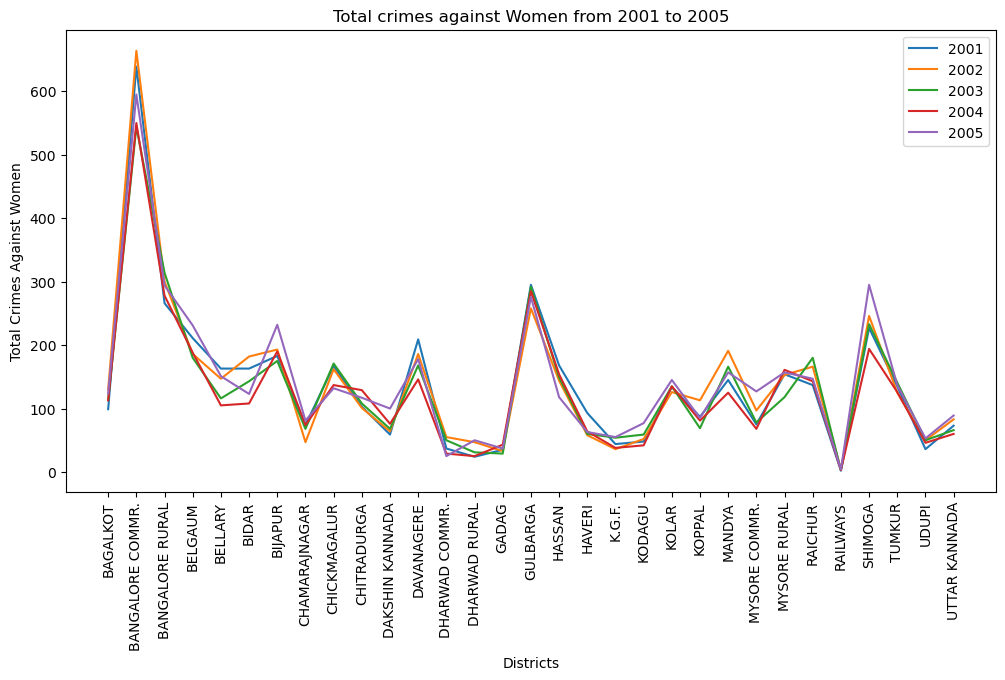

In [54]:
plot_yearly_data(df_yearly, 2001, 2005)

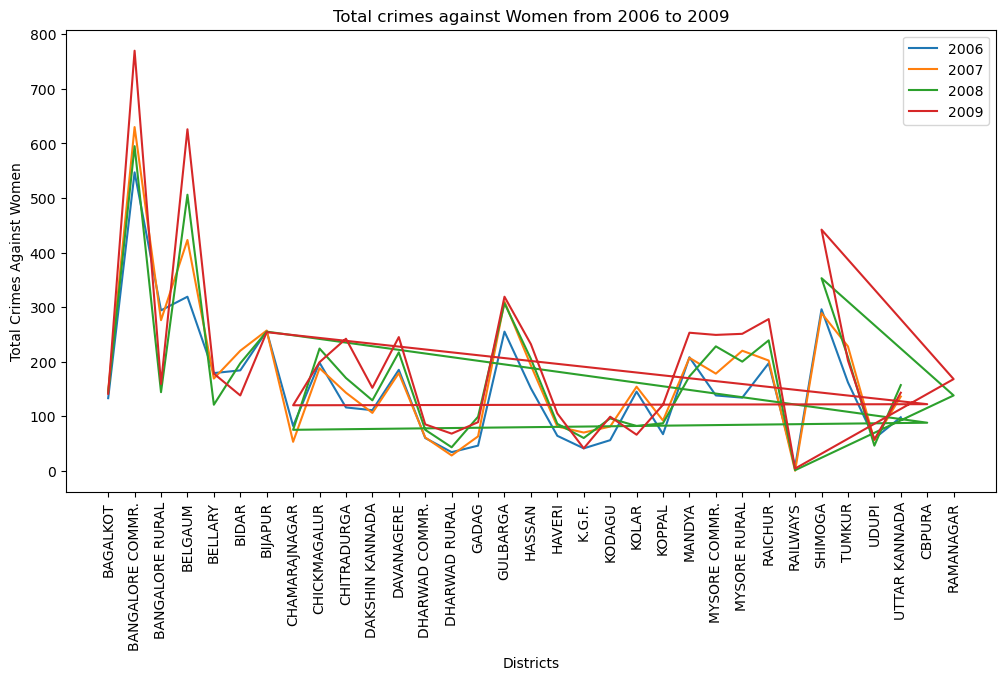

In [55]:
plot_yearly_data(df_yearly, 2006 , 2009)

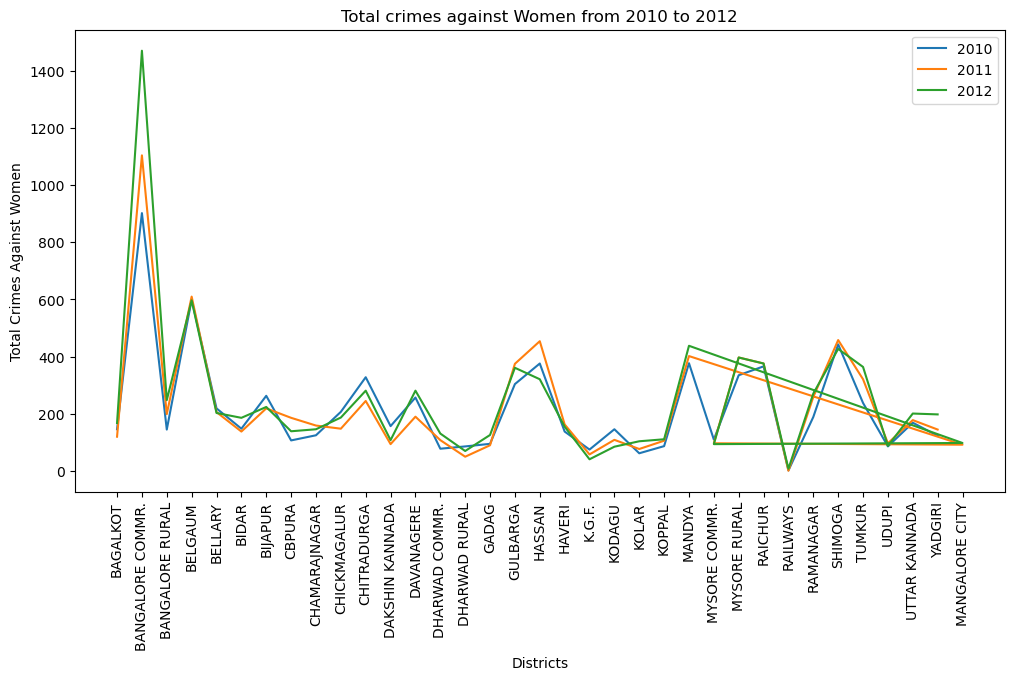

In [56]:
plot_yearly_data(df_yearly, 2010, 2012)

We can clearly see the upward movement of the total number of crimes against women. This could be due to the population increment or other factors. Or the incentives and awareness for people to report more. Maybe crimes are really increasing for some reason. 

Further analysis is needed to be sure of the causes behind such incremental growth each year.

In [57]:
# import pandas as pd

# df_parent = pd.read_csv('b.csv')

# df_extracted = df[['DISTRICT', 'Year','Rape']]
# df_extracted.to_csv('data.csv', index=False)

# print("Extraction complete. 'a.csv' has been created with columns 'name' and 'class'.")


In [58]:
df.head(20)

,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,BAGALKOT,2001,2,7,1,39,0,50,0
1,BANGALORE COMMR.,2001,40,56,40,223,51,229,0
2,BANGALORE RURAL,2001,13,10,30,90,0,123,0
3,BELGAUM,2001,8,12,4,62,0,125,0
4,BELLARY,2001,16,11,5,82,0,49,0
5,BIDAR,2001,7,10,2,90,3,51,0
6,BIJAPUR,2001,6,19,1,65,0,92,0
7,CHAMARAJNAGAR,2001,4,5,7,43,0,15,0
8,CHICKMAGALUR,2001,8,7,4,57,8,83,0
9,CHITRADURGA,2001,18,0,2,48,0,35,0


In [59]:
df

,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,BAGALKOT,2001,2,7,1,39,0,50,0
1,BANGALORE COMMR.,2001,40,56,40,223,51,229,0
2,BANGALORE RURAL,2001,13,10,30,90,0,123,0
3,BELGAUM,2001,8,12,4,62,0,125,0
4,BELLARY,2001,16,11,5,82,0,49,0
...,...,...,...,...,...,...,...,...,...
393,SHIMOGA,2012,14,24,6,158,3,222,0
394,TUMKUR,2012,33,10,18,171,0,132,0
395,UDUPI,2012,5,3,0,41,1,38,0
396,UTTAR KANNADA,2012,7,10,1,97,8,78,0


In [60]:
df_2012 = df[df["Year"]>2011].reset_index()

In [61]:
df_2012.drop(columns=['index'])

,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,BAGALKOT,2012,11,14,6,63,0,72,2
1,BANGALORE COMMR.,2012,90,433,51,321,51,524,0
2,BANGALORE RURAL,2012,31,41,10,70,0,96,0
3,BELGAUM,2012,37,34,5,205,9,307,0
4,BELLARY,2012,18,24,9,48,0,104,0
5,BIDAR,2012,11,24,10,40,2,99,0
6,BIJAPUR,2012,18,24,4,41,0,128,9
7,CBPURA,2012,12,20,12,56,3,36,0
8,CHAMARAJNAGAR,2012,9,8,2,64,0,62,1
9,CHICKMAGALUR,2012,11,7,4,70,2,89,4


In [62]:
crimes_columns = ['Rape', 'Kidnapping and Abduction', 'Dowry Deaths', 
                  'Assault on women with intent to outrage her modesty', 
                  'Insult to modesty of Women', 
                  'Cruelty by Husband or his Relatives', 
                  'Importation of Girls']

df_2012["Total"] = df_2012[crimes_columns].sum(axis=1)

In [63]:
df_2012.drop(columns=['Rape', 'Kidnapping and Abduction', 'Dowry Deaths', 
                  'Assault on women with intent to outrage her modesty', 
                  'Insult to modesty of Women', 
                  'Cruelty by Husband or his Relatives', 
                  'Importation of Girls','index'])

,DISTRICT,Year,Total
0,BAGALKOT,2012,168
1,BANGALORE COMMR.,2012,1470
2,BANGALORE RURAL,2012,248
3,BELGAUM,2012,597
4,BELLARY,2012,203
5,BIDAR,2012,186
6,BIJAPUR,2012,224
7,CBPURA,2012,139
8,CHAMARAJNAGAR,2012,146
9,CHICKMAGALUR,2012,187


In [64]:
# df_extracted = df_stat
# df_extracted.to_csv('stat_file.csv', index=False)

# print("Extraction complete. 'a.csv' has been created with columns 'name' and 'class'.")
